#Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import data

###!!! résoudre à la fin comment importer tout sous le même dossier

In [3]:
train_labels = pd.read_csv("/content/drive/MyDrive/CAS - Final Project/train_labels.csv", header=0)
train_values = pd.read_csv("/content/drive/MyDrive/CAS - Final Project/train_values.csv", header=0)

In [4]:
print("# Train Labels: {}".format(train_labels.shape))
print("# Train Values: {}".format(train_values.shape))

# Train Labels: (260601, 2)
# Train Values: (260601, 39)


In [5]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


#Data preparation

##Preprocessing data

In [6]:
#merge label and training data in a dataset
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')
df = pd.DataFrame(df)

#get dummies for the non numerical data
df = pd.get_dummies(df)

#standardize the data
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df))

#Machine learning

##Preparation of the data and split

In [7]:
#merge label and training data in a dataset
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [8]:
#attribute features to x and y
x = df.drop('damage_grade', axis=1)
y = df['damage_grade']

In [9]:
#get dummies for the non numerical data
x = pd.get_dummies(x)
x.shape

(260601, 69)

In [10]:
#standardize the data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x))

In [11]:
#split the data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

##Logistic regression

In [12]:
#reshape y_train
encoder = OrdinalEncoder()
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()

In [13]:
#define the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [14]:
#train the model
logreg.fit(x_train, y_train_encoded)

LogisticRegression(multi_class='multinomial')

In [15]:
#reshape y_test
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

#predict the labels for y_test
predictions = logreg.predict(x_test)

In [16]:
#mesure accuracy between predicted y_test and real y_test
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5657412559237159


In [17]:
#print classification report and confusion matrix
print("classification report")
print(classification_report(y_test_encoded, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test_encoded, predictions))

conf = confusion_matrix(y_test_encoded, predictions)

print("error rate")

error_rate = (conf[[1],[0]].flat[0] +conf[[0],[1]].flat[0])/len(y_test)
print(error_rate)

classification report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5170
         1.0       0.57      1.00      0.72     29487
         2.0       0.00      0.00      0.00     17464

    accuracy                           0.57     52121
   macro avg       0.19      0.33      0.24     52121
weighted avg       0.32      0.57      0.41     52121

confusion_matrix
[[    0  5170     0]
 [    0 29487     0]
 [    0 17464     0]]
error rate
0.09919226415456342


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#print f1 score
f1_score(y_test_encoded, predictions, average='micro')

0.5657412559237159

##Random forest

In [19]:
#define the model to be test
rf = RandomForestClassifier()

In [20]:
#train the model
rf.fit(x_train, y_train)

#predict the label for x_test
predictions = rf.predict(x_test)

In [21]:
#mesure accuracy between predicted labels and real labels
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.717407570844765


In [22]:
#print classification report and confusion matrix
print("classification report")
print(classification_report(y_test, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test, predictions))
print("error rate")
np.mean(predictions != y_test)

classification report
              precision    recall  f1-score   support

           1       0.68      0.46      0.55      5170
           2       0.72      0.84      0.77     29487
           3       0.73      0.58      0.65     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.63      0.66     52121
weighted avg       0.72      0.72      0.71     52121

confusion_matrix
[[ 2371  2706    93]
 [ 1024 24861  3602]
 [  109  7195 10160]]
error rate


0.2825924291552349

In [23]:
#measure f1 score
f1_score(y_test, predictions, average='micro')

0.717407570844765

##Decision tree

###Gini

In [24]:
dtg_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
dtg_classifier.fit(x_train, y_train)
predictions = dtg_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6373630590357053


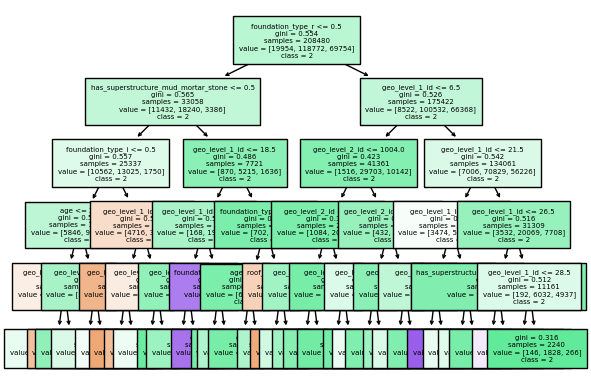

In [25]:
plt.figure()
tree.plot_tree(dtg_classifier, filled=True, feature_names=x_train.columns,fontsize=5, class_names=['1', '2', '3'])
plt.show()

In [26]:
print("classification report")
print(classification_report(y_test, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test, predictions))
print("error rate")
np.mean(predictions != y_test)

classification report
              precision    recall  f1-score   support

           1       0.71      0.17      0.28      5170
           2       0.62      0.93      0.74     29487
           3       0.73      0.29      0.41     17464

    accuracy                           0.64     52121
   macro avg       0.69      0.46      0.48     52121
weighted avg       0.67      0.64      0.59     52121

confusion_matrix
[[  897  4254    19]
 [  349 27336  1802]
 [    9 12468  4987]]
error rate


0.3626369409642946

In [27]:
f1_score(y_test, predictions, average='micro')

0.6373630590357053

###Entropy

In [28]:
dte_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dte_classifier.fit(x_train, y_train)
predictions = dte_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6384950403867923


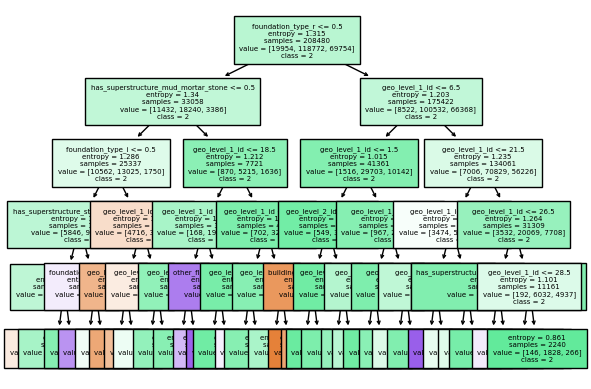

In [29]:
plt.figure()
tree.plot_tree(dte_classifier, filled=True, fontsize=5, feature_names=x_train.columns, class_names=['1', '2', '3'])
plt.show()

In [30]:
print("classification report")
print(classification_report(y_test, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test, predictions))
print("error rate")
np.mean(predictions != y_test)

classification report
              precision    recall  f1-score   support

           1       0.64      0.23      0.34      5170
           2       0.62      0.91      0.74     29487
           3       0.73      0.29      0.42     17464

    accuracy                           0.64     52121
   macro avg       0.66      0.48      0.50     52121
weighted avg       0.66      0.64      0.59     52121

confusion_matrix
[[ 1203  3946    21]
 [  635 26979  1873]
 [   47 12320  5097]]
error rate


0.3615049596132077

In [31]:
f1_score(y_test, predictions, average='micro')

0.6384950403867923

##Neural Network for classification

In [32]:
x = df.drop('damage_grade', axis=1)
y = df['damage_grade']

lb = LabelEncoder()
y = lb.fit_transform(y)

#get dummies for the non numerical data
x = pd.get_dummies(x)

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x = x_scaled

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(208480, 69)
(208480,)
(52121, 69)
(52121,)


In [35]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [36]:
#Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Now y_train_encoded and y_test_encoded should have shape (num_samples, num_classes)
# where num_samples is the number of samples and num_classes is 3 in your case.

# Convert them to numpy arrays
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
y_train = y_train_encoded
y_test = y_test_encoded

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(208480, 69)
(208480, 3)
(52121, 69)
(52121, 3)


In [39]:
model = keras.Sequential([
    layers.Dense(69, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.1),  # Adding dropout with rate 0.2
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),  # Adding dropout with rate 0.2
    layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 69)                4830      
                                                                 
 dropout (Dropout)           (None, 69)                0         
                                                                 
 dense_1 (Dense)             (None, 1000)              70000     
                                                                 
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 batch_normalization (BatchN  (None, 10)               4

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, batch_size=150, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1390/1390 [==============================] - 32s 21ms/step - loss: 1.2364 - accuracy: 0.5897 - val_loss: 0.8132 - val_accuracy: 0.6075
Epoch 2/20
1390/1390 [==============================] - 27s 19ms/step - loss: 0.7951 - accuracy: 0.6165 - val_loss: 0.7873 - val_accuracy: 0.6259
Epoch 3/20
1390/1390 [==============================] - 26s 19ms/step - loss: 0.7827 - accuracy: 0.6279 - val_loss: 0.8038 - val_accuracy: 0.6165
Epoch 4/20
1390/1390 [==============================] - 27s 19ms/step - loss: 0.7734 - accuracy: 0.6375 - val_loss: 0.7617 - val_accuracy: 0.6466
Epoch 5/20
1390/1390 [==============================] - 27s 19ms/step - loss: 0.7653 - accuracy: 0.6443 - val_loss: 0.8335 - val_accuracy: 0.5815
Epoch 6/20
1390/1390 [==============================] - 27s 20ms/step - loss: 0.7587 - accuracy: 0.6491 - val_loss: 0.7489 - val_accuracy: 0.6547
Epoch 7/20
1390/1390 [==============================] - 28s 20ms/step - loss: 0.7538 - accuracy: 0.6508 - val_loss: 0.7502 -

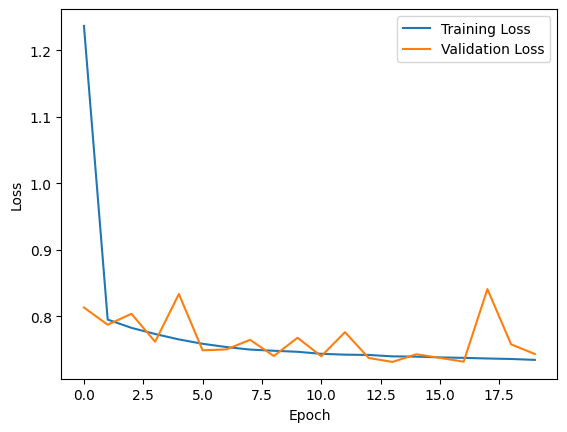

In [42]:
#Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# predict the labels for x_est
predictions = model.predict(x_test)

# Convert predicted probabilities to class labels
y_test_pred_labels = np.argmax(predictions, axis=1)

# Convert y_test from one-hot encoded format to class labels
y_test_true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy score between predicted label and real label for test set
accuracy = accuracy_score(y_test_true_labels, y_test_pred_labels)
print("Accuracy:", accuracy)

1629/1629 [==============================] - 10s 6ms/step
Accuracy: 0.6670823660328851


In [44]:
print("classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels))
print("confusion_matrix")
print(confusion_matrix(y_test_true_labels, y_test_pred_labels))
print("error rate")
np.mean(predictions != y_test)

classification report
              precision    recall  f1-score   support

           0       0.58      0.48      0.53      5170
           1       0.66      0.84      0.74     29487
           2       0.71      0.43      0.53     17464

    accuracy                           0.67     52121
   macro avg       0.65      0.58      0.60     52121
weighted avg       0.67      0.67      0.65     52121

confusion_matrix
[[ 2493  2621    56]
 [ 1707 24827  2953]
 [  125  9890  7449]]
error rate


1.0

In [45]:
f1_score(y_test_true_labels, y_test_pred_labels, average='micro')

0.6670823660328851

#Best working with Smote

In [46]:
#merge label and training data in a dataset
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [47]:
#split data between features and target
x = df.drop('damage_grade', axis=1)
y = df['damage_grade']

In [48]:
#get dummies for the non numerical data
x = pd.get_dummies(x)

In [49]:
#count the number of data before oversampling
counter = Counter(y)
print("Before", counter)

#oversample the data
smt = SMOTE(random_state=1)
x_sm, y_sm = smt.fit_resample(x, y)

#count the number of data after oversampling
counter = Counter (y_sm)
print("After", counter)

Before Counter({2: 148259, 3: 87218, 1: 25124})
After Counter({3: 148259, 2: 148259, 1: 148259})


In [50]:
x = x_sm
y = y_sm

In [51]:
#standardize the data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x))

In [52]:
#split in train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [53]:
# Convert y_train and y_test to Numpy arrays
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Reshape y_train_array and y_test_array
y_train_reshaped = y_train_array.reshape(-1, 1)
y_test_reshaped = y_test_array.reshape(-1, 1)

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
y_train = y_train_encoded
y_test = y_test_encoded

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(355821, 69)
(355821, 3)
(88956, 69)
(88956, 3)


In [56]:
#define the model and fit it
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
#predict the label for test
predictions = model.predict(x_test)

In [58]:
predictions.shape

(88956, 3)

In [59]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

# Convert y_test from one-hot encoded format to class labels
y_test = np.argmax(y_test, axis=1)

In [60]:
#Calculate accuracy score between predicted label and real label
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#print classification report and confusion matrix
print("classification report")
print(classification_report(y_test, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test, predictions))
print("error rate")
np.mean(predictions != y_test)

Accuracy: 0.7832973604928279
classification report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     29474
           1       0.73      0.77      0.75     29787
           2       0.81      0.70      0.75     29695

    accuracy                           0.78     88956
   macro avg       0.78      0.78      0.78     88956
weighted avg       0.78      0.78      0.78     88956

confusion_matrix
[[26127  2089  1258]
 [ 3227 22792  3768]
 [ 2771  6164 20760]]
error rate


0.21670263950717208

In [61]:
f1_score(y_test, predictions, average='micro')

0.7832973604928278

#Best working with PCA

In [62]:
#merge label and training data in a dataset
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [63]:
#get dummies for the non numerical data
pca = pd.get_dummies(df)

In [64]:
#keep only the values of the merged data
X = pca.values

In [65]:
#standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [66]:
#apply the PCA for 99% of the variation and print the shape of the dataset with number of features preserved
pca_99 = PCA(n_components=0.99, random_state=0)
pca_99.fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)

In [67]:
#store the data in a new Dataframe with reduced dimmensio to preserve 99% of the variation
pca_new = pd.DataFrame(X_pca_99)
pca_new.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-1.406757,1.688214,0.186461,1.839380,-0.594475,-0.838058,-0.358257,0.729573,-1.336975,-1.700436,...,1.266580,-0.424292,-0.901690,1.447866,0.617100,-0.089621,-0.133631,-0.425104,-0.237403,-0.084366
1,-0.606437,0.248807,-1.410575,0.358429,1.487898,1.477195,-1.591125,0.936672,-0.250142,2.990650,...,-0.388266,-0.389105,0.171052,0.062008,0.034495,0.398360,0.087263,0.270351,-0.233440,-0.032744
2,-0.904626,0.358000,0.070117,1.622792,-0.271556,-0.408053,-0.527515,-0.063003,-1.428303,-1.893303,...,0.572963,0.199555,-0.432503,-0.221958,-0.185475,0.347296,-0.404877,-0.384290,0.101458,-0.130163
3,-1.026472,-1.529606,1.020320,-0.380360,0.071626,0.271964,-0.437499,-2.139721,1.221611,-0.889686,...,-0.733880,1.220591,-1.204369,0.187920,-0.764402,1.155191,-0.379059,-0.299011,0.035717,-0.294604
4,-0.437243,1.571836,1.186131,1.126621,-0.783485,0.247116,-0.993635,-1.311814,1.595800,0.178027,...,1.420051,-0.357847,-1.089997,0.981866,0.653769,0.524956,0.486214,0.899085,-0.076145,-0.087937


In [68]:
# Concatenate the labels with the reduced dimensionality dataset
pca_ok = pd.concat([pca, pca_new], axis=1)
pca_ok.shape
pca_ok.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,48,49,50,51,52,53,54,55,56,57
0,802906,6,487,12198,2,30,6,5,1,1,...,1.266580,-0.424292,-0.901690,1.447866,0.617100,-0.089621,-0.133631,-0.425104,-0.237403,-0.084366
1,28830,8,900,2812,2,10,8,7,0,1,...,-0.388266,-0.389105,0.171052,0.062008,0.034495,0.398360,0.087263,0.270351,-0.233440,-0.032744
2,94947,21,363,8973,2,10,5,5,0,1,...,0.572963,0.199555,-0.432503,-0.221958,-0.185475,0.347296,-0.404877,-0.384290,0.101458,-0.130163
3,590882,22,418,10694,2,10,6,5,0,1,...,-0.733880,1.220591,-1.204369,0.187920,-0.764402,1.155191,-0.379059,-0.299011,0.035717,-0.294604
4,201944,11,131,1488,3,30,8,9,1,0,...,1.420051,-0.357847,-1.089997,0.981866,0.653769,0.524956,0.486214,0.899085,-0.076145,-0.087937


In [69]:
#split data between features and target
x = pca_ok.drop('damage_grade', axis=1)
y = pca_ok['damage_grade']

#encode the label of y
lb = LabelEncoder()
y = lb.fit_transform(y)

In [70]:
print(x.shape)
print(y.shape)

(260601, 127)
(260601,)


In [72]:
#count the number of data before oversampling
counter = Counter(y)
print("Before", counter)

x.columns = x.columns.astype(str)

#oversample the data
smt = SMOTE(random_state=1)
x_sm, y_sm = smt.fit_resample(x, y)

#count the number of data after oversampling
counter = Counter (y_sm)
print("After", counter)

#reattribute the variable
x = x_sm
y = y_sm

#standardize the data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x))

Before Counter({1: 148259, 2: 87218, 0: 25124})
After Counter({2: 148259, 1: 148259, 0: 148259})


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(355821, 127)
(355821,)
(88956, 127)
(88956,)


In [75]:
# Convert y_train and y_test to NumPy arrays
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Reshape y_train_array and y_test_array
y_train_reshaped = y_train_array.reshape(-1, 1)
y_test_reshaped = y_test_array.reshape(-1, 1)

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)

#reattribute the data
y_train = y_train_encoded
y_test = y_test_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(355821, 127)
(355821, 3)
(88956, 127)
(88956, 3)


In [77]:
#define the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [78]:
#predict the label for test set
predictions = model.predict(x_test)

In [79]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

# Convert y_test from one-hot encoded format to class labels
y_test = np.argmax(y_test, axis=1)

In [80]:
#Calculate accuracy score between predicted label and real label
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#print classification report and confusion matrix
print("classification report")
print(classification_report(y_test, predictions))
print("confusion_matrix")
print(confusion_matrix(y_test, predictions))
print("error rate")
np.mean(predictions != y_test)

Accuracy: 0.9919285939115967
classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29474
           1       0.99      0.99      0.99     29787
           2       1.00      0.99      0.99     29695

    accuracy                           0.99     88956
   macro avg       0.99      0.99      0.99     88956
weighted avg       0.99      0.99      0.99     88956

confusion_matrix
[[29421    53     0]
 [  308 29469    10]
 [  171   176 29348]]
error rate


0.008071406088403255

In [81]:
#print f1 score
f1_score(y_test, predictions, average='micro')

0.9919285939115967